In [15]:
from qiskit import *

In [16]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(channel="ibm_quantum", token="630f27e78abace48f791d091a52007d36ce02293d648e5d05c7190a68322525704ae1a6ed087e32ffd18c9324271ade6f92b595ba8077d454df7d6796bc7eca6", set_as_default=True, overwrite=True)

In [17]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
# Use this command if you didn't save your credentials:
# service = QiskitRuntimeService(channel="ibm_quantum", token="<MY_IBM_QUANTUM_TOKEN>")
 
# Load saved credentials
service = QiskitRuntimeService()

In [18]:
qc = QuantumCircuit(2)

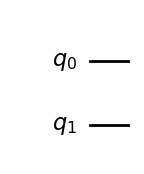

In [19]:
qc.draw('mpl')

In [20]:
qc.h(0)

In [21]:
qc.cx(0,1)

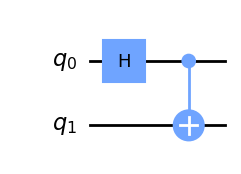

In [22]:
qc.draw('mpl')

In [23]:
from qiskit.quantum_info import Pauli

In [24]:
ZZ = Pauli('ZZ')
ZI = Pauli('ZI')
IZ = Pauli('IZ')
XX = Pauli('XX')
XI = Pauli('XI')
IX = Pauli('IX')

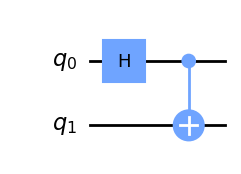

In [25]:
qc.draw('mpl')

In [26]:
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Options
 
service = QiskitRuntimeService()
 
# Run on the least-busy backend you have access to
backend = service.least_busy(simulator=False, operational=True)
 
options = Options()
options.resilience_level = 1
options.optimization_level = 3
 
# Create an Estimator object
estimator = Estimator(backend, options=options)
 
# Submit the circuit to Estimator
job = estimator.run(circuits=[qc]*6, observables=[IZ, IX, ZI, XI, ZZ, XX], shots = 5000)
 
# Once the job is complete, get the result
job.result()

EstimatorResult(values=array([-0.00537135,  0.03098856,  0.00492829,  0.02751631,  0.99870182,
        1.01440601]), metadata=[{'variance': 1.0703780300429522, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 1.0694465906422914, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 1.05752175133292, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 1.056788892351183, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.13212131178243247, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}, {'variance': 0.10050707694964407, 'shots': 5008, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}])